## In this Notebook I am going to impliment the **Handle the Missing Values** Pediction.

### Ways to Handle Missing values 

 1- **Deleting Rows** with missing values.

 2- Impute missing values with **Mean/Median/Mode**.

 3- **Prediction** of missing values.

### Importing required packages

In [15]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
path = r"F:\Downloads\loan.csv"
df = pd.read_csv(path)

# Lets make copies of data for apply diffrent types of handling missing values.

df_delete_rows = df.copy() # In this I will fill values with mean.
df_Mean_Median_Mode = df.copy() # In this I will fill values with median.
df_Prediction = df.copy() # In this I will fill values with mode.

### Methode 1- **Deleting Rows**

In [17]:
df_delete_rows

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,Y
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,Y
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,Y
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,N
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban,Y
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban,Y
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban,Y
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural,Y


In [18]:
df_delete_rows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
 12  Loan_Status        367 non-null    object 
dtypes: float64(3), int64(2), object(8)
memory usage: 37.4+ KB


In [19]:
df_delete_rows.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
Loan_Status           0
dtype: int64

### Here, In this dataset null values are present in 6 columns - 

#### [**Gender**, **Dependents**, **Self_Employed**, **LoanAmount**, **Loan_Amount_Term**, **Credit_History**]

### **Visualize** Our Dataset For Better Understanding

<AxesSubplot:title={'center':'Heatmap for Missing Values'}>

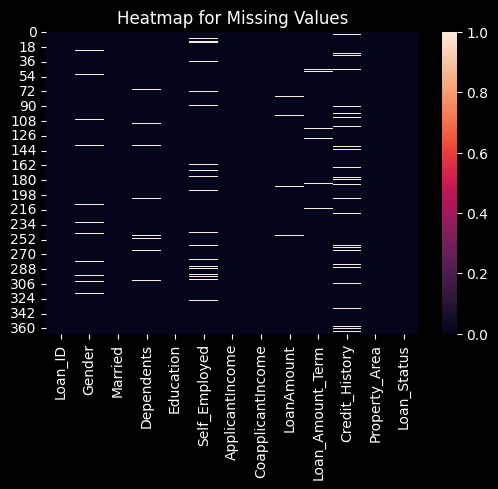

In [20]:
plt.figure(figsize=(6,4), dpi=100)
plt.title("Heatmap for Missing Values")
sns.heatmap(df_delete_rows.isna())

### Now I am Handling missing values to **Delete** that rows

Note > 

Prose :
  - Due to this methode **Missing Values** will be remove.
  - Our Data also will clean.
    
Conse :
  - From using this methode Posibily of **Important Data Loss** is very high.
  - It deletes all the information of entire row.


In [21]:
df_delete_rows = df_delete_rows.dropna()

### Now the Dataset is this - 

Rows >
 - *Before* *Delting*** Null Values : **367** Rows. 
 - *After* *Delting*** Null Values : **279** Rows.

Loss >

- *Data* *Loss* : **88** Rows From **367** Rows. ***Huge Loss***


In [22]:
df_delete_rows.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [23]:
df_delete_rows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 289 entries, 0 to 366
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            289 non-null    object 
 1   Gender             289 non-null    object 
 2   Married            289 non-null    object 
 3   Dependents         289 non-null    object 
 4   Education          289 non-null    object 
 5   Self_Employed      289 non-null    object 
 6   ApplicantIncome    289 non-null    int64  
 7   CoapplicantIncome  289 non-null    int64  
 8   LoanAmount         289 non-null    float64
 9   Loan_Amount_Term   289 non-null    float64
 10  Credit_History     289 non-null    float64
 11  Property_Area      289 non-null    object 
 12  Loan_Status        289 non-null    object 
dtypes: float64(3), int64(2), object(8)
memory usage: 31.6+ KB


<AxesSubplot:title={'center':'Missing Values Removed (Deleting Rows)'}>

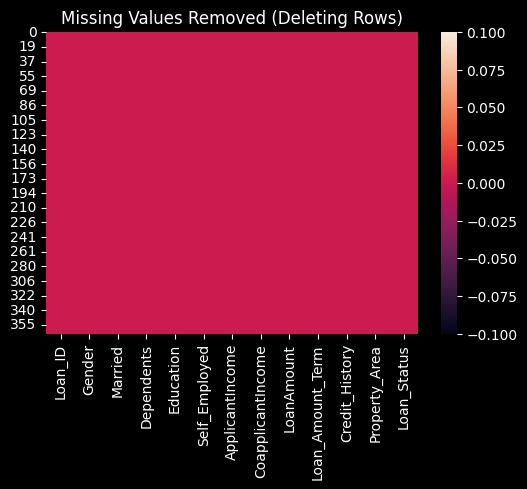

In [24]:
plt.figure(figsize=(6,4), dpi=100)
plt.title("Missing Values Removed (Deleting Rows)")
sns.heatmap(df_delete_rows.isna())

## Now There is no **Null Values** present in this Dataset.